In [1]:
setwd('C:\\Users\\user\\Desktop\\Курсовая\\WWND\\medium')
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [2]:
data = read.table('rnaMu.csv', header=T, sep = ';', row.names = 1)
meta = read.table('metaMu.csv', header=T, sep = '\t', row.names = 1)

In [3]:
head(data)
head(meta)

,TCGA.3N.A9WC,TCGA.3N.A9WD,TCGA.EE.A2GO,TCGA.EE.A2GP,TCGA.EE.A2GT,TCGA.EE.A2GU,TCGA.EE.A2M6,TCGA.EE.A2M8,TCGA.EE.A2MC,TCGA.EE.A2MF,...,TCGA.FW.A3R5,TCGA.FW.A5DX,TCGA.GF.A2C7,TCGA.GF.A769,TCGA.GN.A265,TCGA.GN.A266,TCGA.GN.A267,TCGA.GN.A26D,TCGA.GN.A4U3,TCGA.GN.A4U4
ENSG00000000003,1846,3014,1207,2540,1978,2818,4364,1686,644,3540,...,137,977,3011,2027,1048,2947,1144,3283,716,2472
ENSG00000000005,2,13,3,7,0,1,5,2,0,1,...,1,2,1,0,4,1,1,2,0,5
ENSG00000000419,1407,1246,2811,1839,755,4757,3065,1074,2947,2108,...,2275,3172,1937,2861,3432,1863,1113,2334,1349,1599
ENSG00000000457,1133,492,1011,628,531,1699,656,927,688,1265,...,791,942,1174,465,593,1131,626,954,930,1382
ENSG00000000460,659,196,615,614,433,1578,1090,490,713,909,...,1425,1481,1296,646,875,908,444,1042,783,689
ENSG00000000938,628,397,138,839,1050,578,1391,1144,1055,262,...,483,116,90,202,1132,809,123,160,306,88


,MAGEC1mut
TCGA.3N.A9WC,mut
TCGA.3N.A9WD,mut
TCGA.EE.A2GO,mut
TCGA.EE.A2GP,norm
TCGA.EE.A2GT,norm
TCGA.EE.A2GU,norm


In [4]:
#data[,1] = as.numeric(data[,1])
#colnames(data) <- NULL
dds <- DESeqDataSetFromMatrix(countData = data, colData = meta, design = ~ MAGEC1mut)


In [5]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 3052 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [27]:
results(dds)

log2 fold change (MLE): MAGEC1mut norm vs mut 
Wald test p-value: MAGEC1mut norm vs mut 
DataFrame with 60483 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat     pvalue
                  <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000000003 2103.297928     -0.4216818 0.3454997 -1.220498 0.22227601
ENSG00000000005    2.838987     -0.9671350 0.8867831 -1.090611 0.27544427
ENSG00000000419 2067.503341      0.2607081 0.2216014  1.176473 0.23940591
ENSG00000000457  888.837395     -0.3501400 0.1698052 -2.062010 0.03920677
ENSG00000000460  793.658043      0.2429120 0.1987837  1.221991 0.22171088
...                     ...            ...       ...       ...        ...
ENSGR0000275287           0             NA        NA        NA         NA
ENSGR0000276543           0             NA        NA        NA         NA
ENSGR0000277120           0             NA        NA        NA         NA
ENSGR0000280767           0             NA        NA     

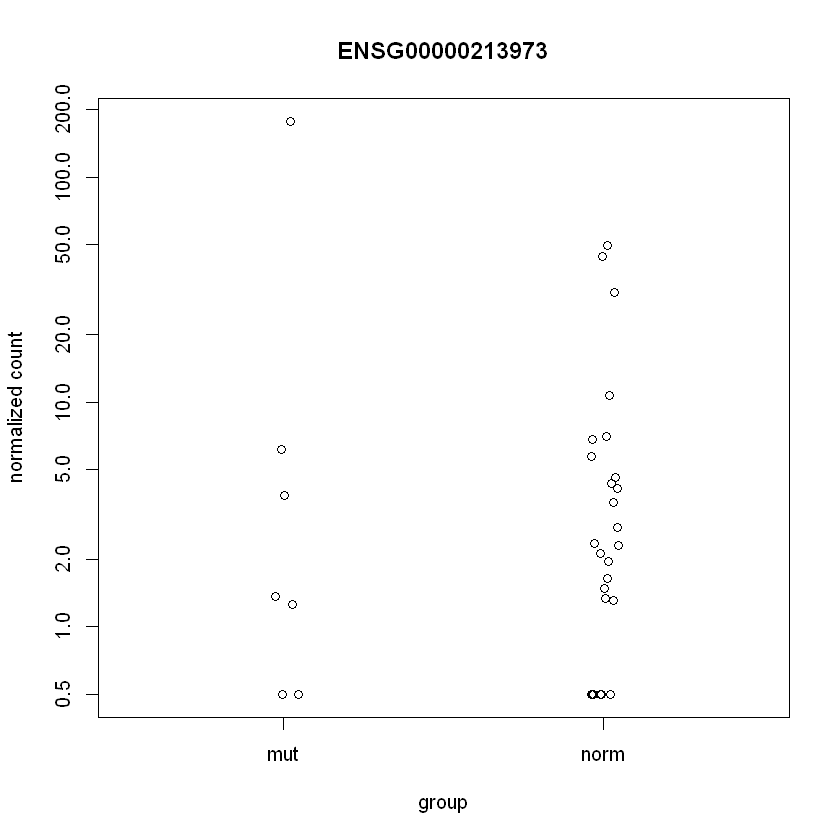

In [6]:
plotCounts(dds, gene="ENSG00000213973", intgroup="MAGEC1mut") 
#Очень интересно.. У большого количества людей в норме ZNF99 не экспрессируется

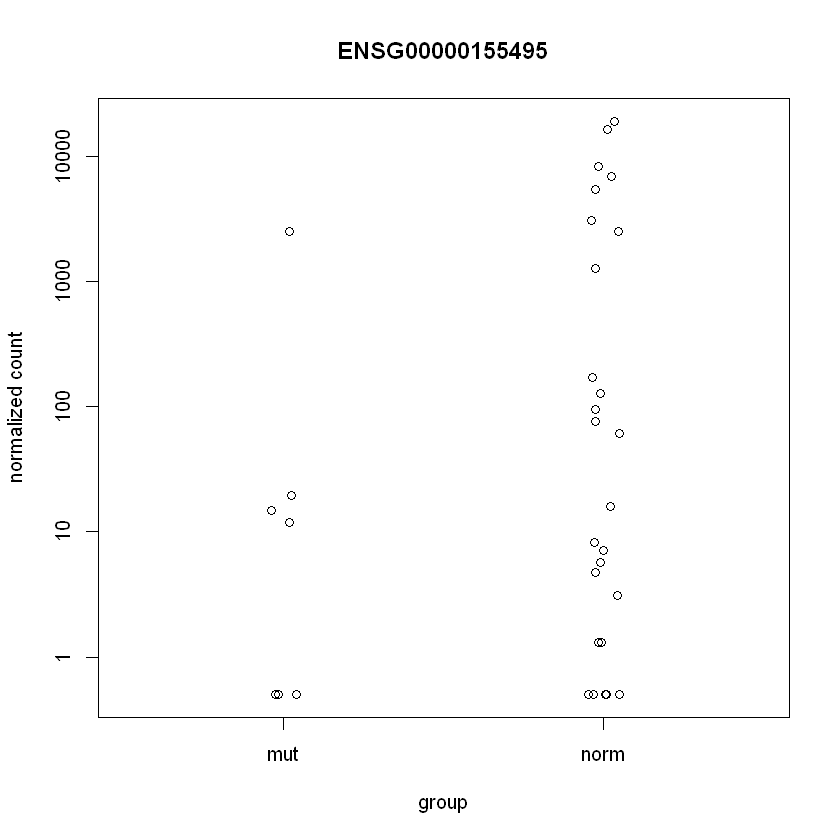

In [7]:
plotCounts(dds, gene="ENSG00000155495", intgroup="MAGEC1mut") 

In [8]:
contrast_mut <-  c("MAGEC1mut", "mut", "norm")
res_tableMUT_unshrunken <- results(dds, contrast=contrast_mut, alpha = 0.05)
res_tableMUT <- lfcShrink(dds, contrast=contrast_mut, res=res_tableMUT_unshrunken)

In [11]:
res_tableMUT

log2 fold change (MAP): ZNF99mut mut vs norm 
Wald test p-value: ZNF99mut mut vs norm 
DataFrame with 60483 rows and 6 columns
                   baseMean log2FoldChange     lfcSE        stat     pvalue
                  <numeric>      <numeric> <numeric>   <numeric>  <numeric>
ENSG00000000003 2038.935612    -0.59099688 0.3291059 -1.79661952 0.07239604
ENSG00000000005    5.036524    -1.64711130 0.7606526 -1.74221906 0.08147012
ENSG00000000419 1582.654475    -0.02344406 0.2379372 -0.09853273 0.92150928
ENSG00000000457  774.297406     0.10686573 0.2247010  0.47558358 0.63437107
ENSG00000000460  628.682954     0.05719840 0.2999192  0.19070634 0.84875567
...                     ...            ...       ...         ...        ...
ENSGR0000275287           0             NA        NA          NA         NA
ENSGR0000276543           0             NA        NA          NA         NA
ENSGR0000277120           0             NA        NA          NA         NA
ENSGR0000280767           0          

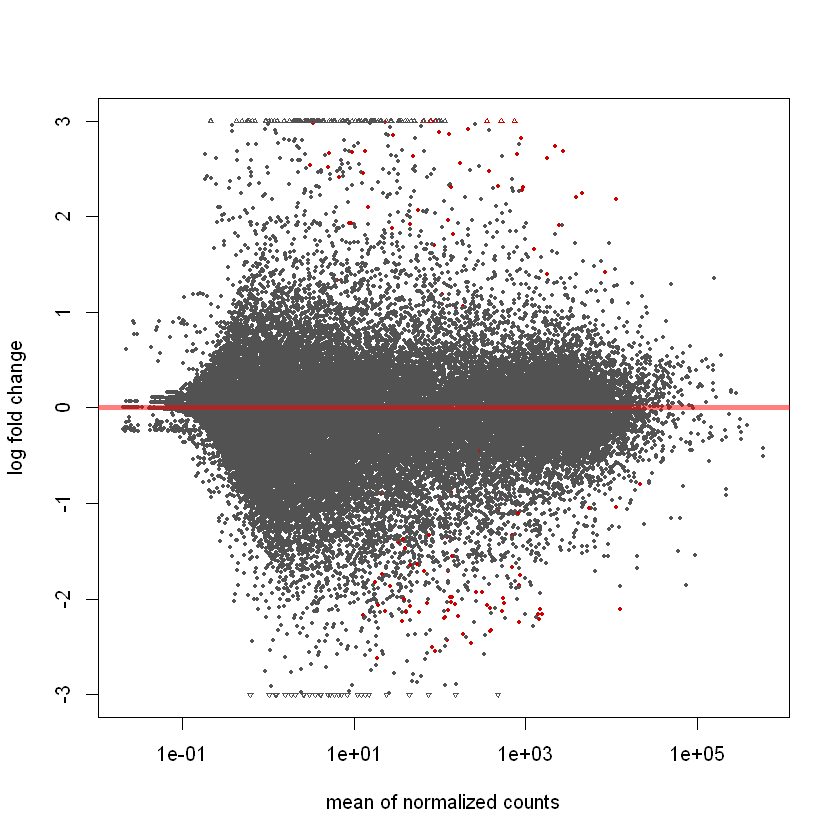

In [9]:
plotMA(res_tableMUT, ylim=c(-3,3))

In [10]:
write.csv(res_tableMUT, 'magr.csv')

In [11]:
results = read.table('magr.csv', sep = ',', header = T)
results

id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,2103.297928,0.39424134,0.3229022,1.22049835,0.22227601,0.7962175
ENSG00000000005,2.838987,0.66722200,0.6084679,1.09061058,0.27544427,NA
ENSG00000000419,2067.503341,-0.25339982,0.2153980,-1.17647302,0.23940591,0.8097036
ENSG00000000457,888.837395,0.34432793,0.1669848,2.06201018,0.03920677,0.4916945
ENSG00000000460,793.658043,-0.23740965,0.1942792,-1.22199141,0.22171088,0.7962175
ENSG00000000938,497.830641,-0.19097639,0.4359359,-0.43845476,0.66105666,0.9579092
ENSG00000000971,3116.221190,-0.64305445,0.5226384,-1.23905690,0.21532443,0.7904770
ENSG00000001036,4187.546945,-0.44508307,0.2610838,-1.70503797,0.08818734,0.6369559
ENSG00000001084,1825.738316,-0.34069273,0.2293079,-1.48584185,0.13732096,0.7107239
ENSG00000001167,3366.667220,-0.54612894,0.3043037,-1.79536921,0.07259489,0.6041478


In [24]:
all_genes <- as.character(results$id)
sig_genes <- as.character(sdata$id)
head(all_genes)
head(sig_genes)

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000938"

[1] "ENSG00000184454" "ENSG00000167588" "ENSG00000131771" "ENSG00000205649"
[5] "ENSG00000141750" "ENSG00000102383"

In [18]:
library(SPIA)
background_entrez <- results$id

sig_res_entrez <- sdata

sig_entrez <- sig_res_entrez$log2FoldChange
head(sig_entrez)

names(sig_entrez) <- sig_res_entrez$id

spia_result <- spia(de=sig_entrez, all=background_entrez, organism="hsa")
head(spia_result, n=20)

[1] 4.000559 3.939301 3.836786 3.373913 3.194037 3.132642


Done pathway 1 : RNA transport..
Done pathway 2 : RNA degradation..
Done pathway 3 : PPAR signaling pathway..
Done pathway 4 : Fanconi anemia pathway..
Done pathway 5 : MAPK signaling pathway..
Done pathway 6 : ErbB signaling pathway..
Done pathway 7 : Calcium signaling pathway..
Done pathway 8 : Cytokine-cytokine receptor int..
Done pathway 9 : Chemokine signaling pathway..
Done pathway 10 : NF-kappa B signaling pathway..
Done pathway 11 : Phosphatidylinositol signaling..
Done pathway 12 : Neuroactive ligand-receptor in..
Done pathway 13 : Cell cycle..
Done pathway 14 : Oocyte meiosis..
Done pathway 15 : p53 signaling pathway..
Done pathway 16 : Sulfur relay system..
Done pathway 17 : SNARE interactions in vesicula..
Done pathway 18 : Regulation of autophagy..
Done pathway 19 : Protein processing in endoplas..
Done pathway 20 : Lysosome..
Done pathway 21 : mTOR signaling pathway..
Done pathway 22 : Apoptosis..
Done pathway 23 : Vascular smooth muscle contrac..
Done pathway 24 : Wnt s

Name,ID,pSize,NDE,pNDE,tA,pPERT,pG,pGFdr,pGFWER,Status,KEGGLINK


In [21]:
ego <- enrichGO(gene = sig_genes, 
                universe = all_genes,
                keyType = "ENSEMBL",
                OrgDb = org.Hs.eg.db, 
                ont = "BP", 
                pAdjustMethod = "BH", 
                qvalueCutoff = 0.05, 
                readable = TRUE)
#cluster_summary <- data.frame(ego)
#write.csv(cluster_summary, "clusterProfiler_MAGEC12.csv")

In [21]:
plotP(spia_result, threshold=0.05)

ERROR: Error in plotP(spia_result, threshold = 0.05): plotP can be applied only to a dataframe produced by spia function!!!


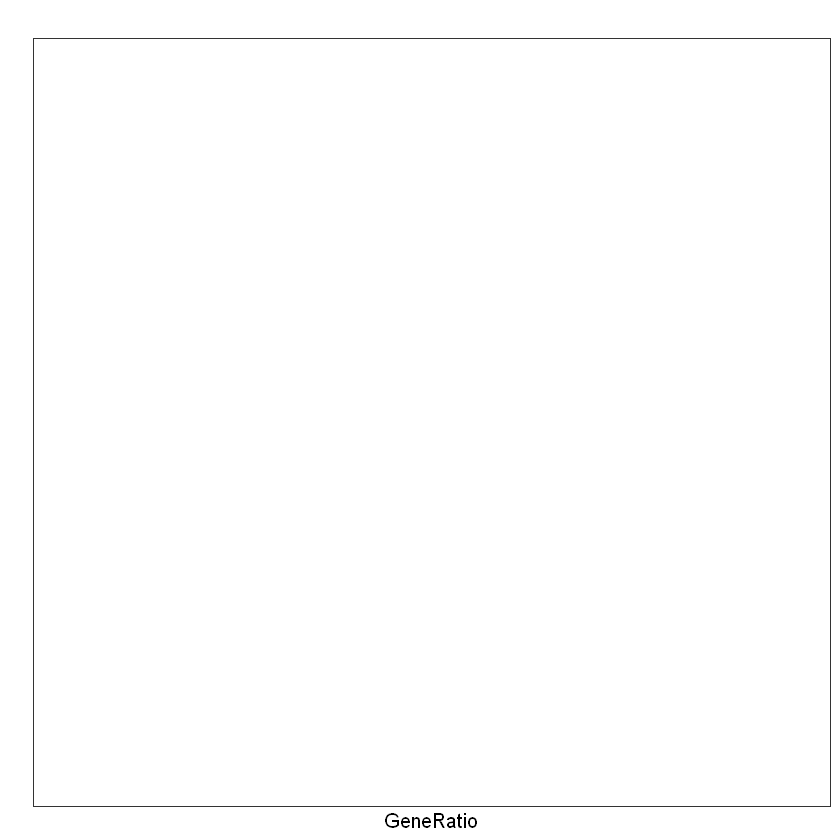

In [22]:
dotplot(ego, showCategory=50)

In [23]:
enrichMap(ego, n=50, vertex.label.font=6, vertex.label.cex=0.5)

ERROR: Error in enrichMap(ego, n = 50, vertex.label.font = 6, vertex.label.cex = 0.5): no enriched term found...


In [8]:
??enrichMap

starting httpd help server ... done


In [35]:
install.packages('topGO')
library(topGO)
plotGOgraph(ego)

Installing package into 'C:/Users/user/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


In [14]:
OE_foldchanges <- sdata$log2FoldChange

names(OE_foldchanges) <- sdata$id

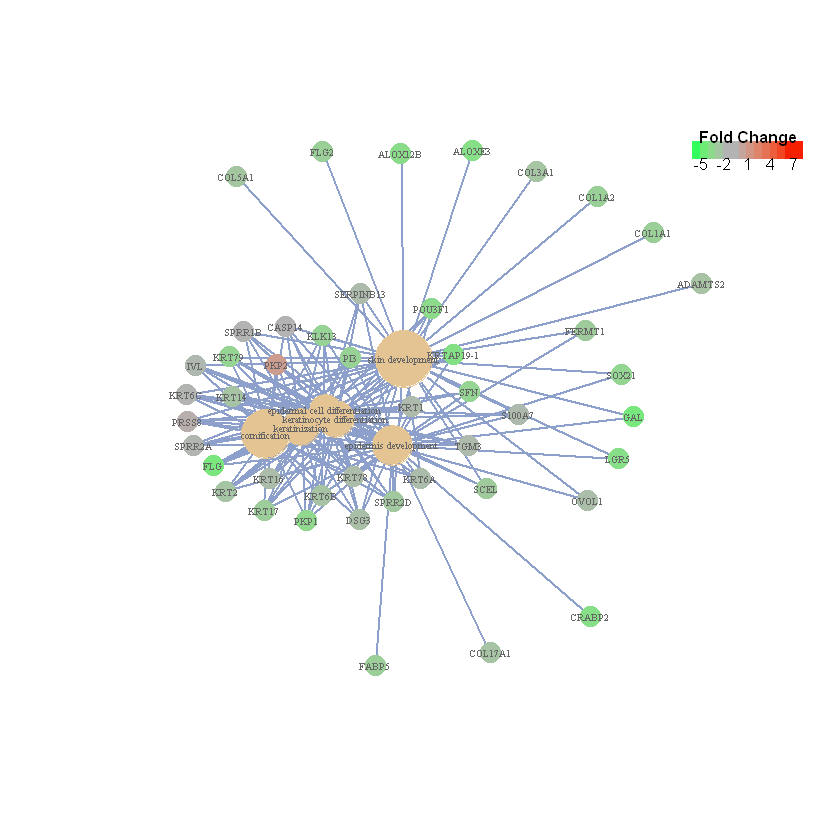

In [24]:
## To color genes by log2 fold changes, we need to extract the log2 fold changes from our results table creating a named vector
OE_foldchanges <- sdata$log2FoldChange

names(OE_foldchanges) <- sdata$id

## Cnetplot details the genes associated with one or more terms - by default gives the top 5 significant terms (by padj)
cnetplot(ego, 
         categorySize="pvalue", 
         showCategory = 6, 
         foldChange=OE_foldchanges, 
         vertex.label.font=0.5,
         vertex.label.cex=0.5)

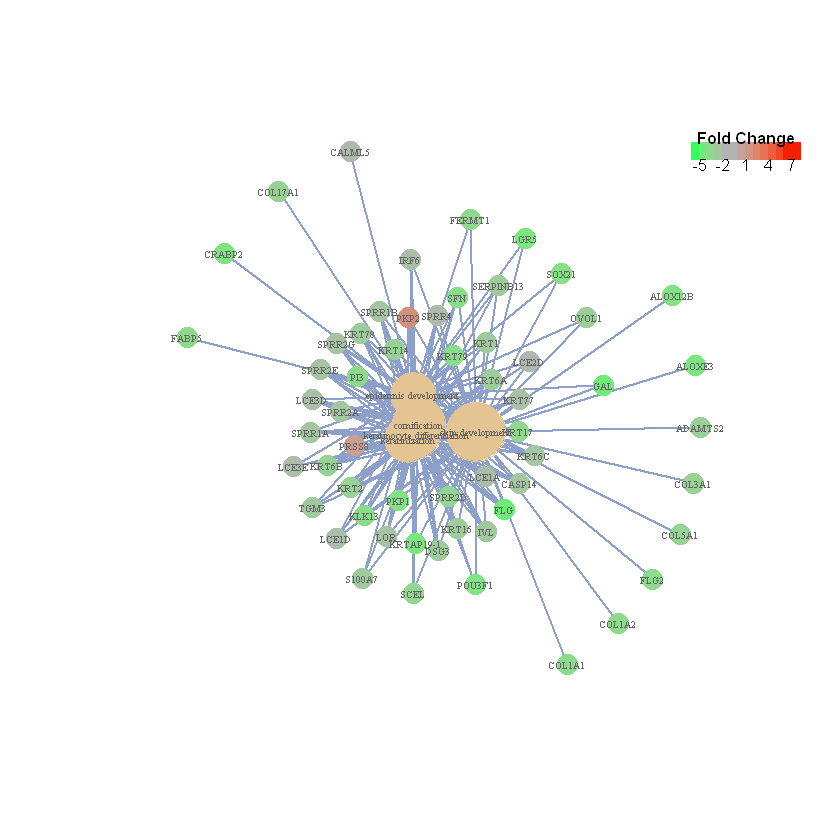

In [17]:
cnetplot(ego, 
         categorySize="pvalue", 
         showCategory = 5, 
         foldChange=OE_foldchanges, 
         vertex.label.cex =0.5, vertex.label.font=0.5)

In [19]:
DEGreport::degPlotWide(dds, genes = row.names(results)[1:5], group = "ZNF99mut")

ERROR: Error in counts(dds, normalized = normalized, replaced = replaced)[gene, : подгруппа выходит за пределы


In [14]:
sdata = read.table('magsr.csv', sep = ';', header = T)
sdata


id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000184454,88.277337,4.000559,0.6017550,6.229873,4.668139e-10,4.039496e-06
ENSG00000167588,526.369978,3.939301,0.6161641,5.921547,3.189264e-09,1.820750e-05
ENSG00000131771,749.074523,3.836786,0.6390634,5.414825,6.134860e-08,2.275157e-04
ENSG00000205649,78.059347,3.373913,0.6168541,-4.064852,4.806290e-05,2.045431e-02
ENSG00000141750,355.043508,3.194037,0.6327425,4.634141,3.584228e-06,3.001502e-03
ENSG00000102383,63.889818,3.132642,0.5741517,5.237295,1.629469e-07,4.230102e-04
ENSG00000107147,23.043455,2.986436,0.5432009,5.345752,9.004228e-08,2.921872e-04
ENSG00000257671,3.318457,2.980308,0.6488904,3.885720,1.020271e-04,3.153124e-02
ENSG00000067715,216.344555,2.913333,0.6003498,4.602457,4.175366e-06,3.284621e-03
ENSG00000157445,99.716399,2.878391,0.5568611,5.004898,5.589174e-07,1.116115e-03


In [8]:
sdata = read.table('DEmagec12_sign.csv', sep = '\t', header = T)

Loading required package: quantreg
Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



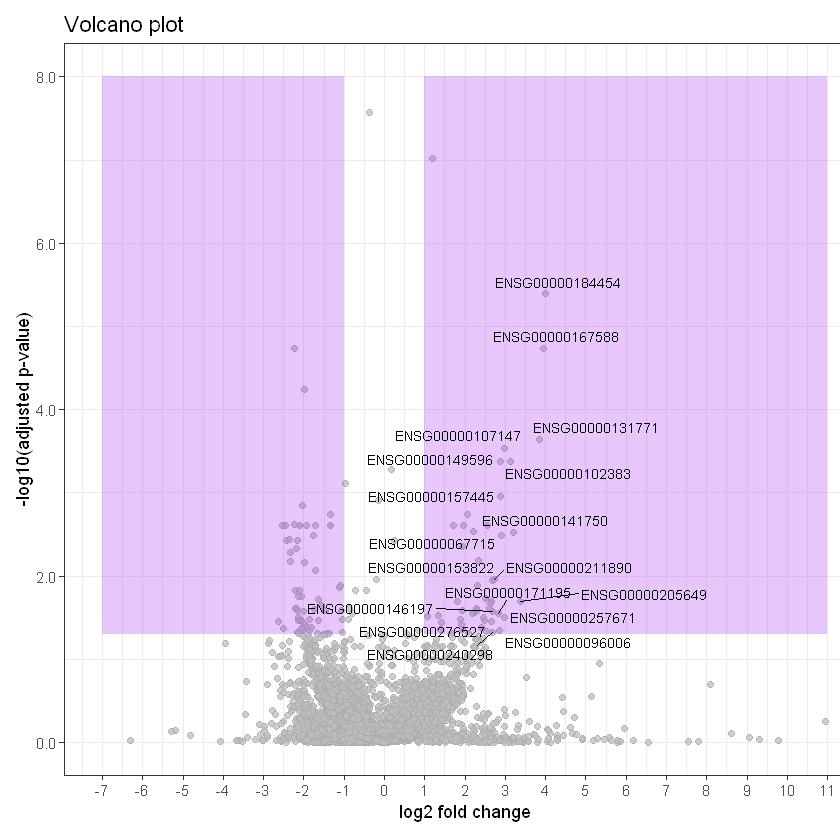

In [19]:
library(DEGreport)
DEGreport::degVolcano(
    shade.colour = "purple",
    data.frame(results[,c("log2FoldChange","padj")]), # table - 2 columns
    plot_text = data.frame(sdata[1:18,c("log2FoldChange","padj","id")])) # table to add names


In [27]:
res_tableMUT

log2 fold change (MAP): ZNF99mut mut vs norm 
Wald test p-value: ZNF99mut mut vs norm 
DataFrame with 60488 rows and 6 columns
                   baseMean log2FoldChange     lfcSE       stat     pvalue
                  <numeric>      <numeric> <numeric>  <numeric>  <numeric>
ENSG00000000003 2059.253373    -0.43103631 0.3299009 -1.3069025  0.1912458
ENSG00000000005    4.999658    -1.97605644 0.8062111 -0.8638443  0.3876734
ENSG00000000419 1600.328160     0.22009813 0.2377733  0.9256361  0.3546351
ENSG00000000457  777.986047    -0.06728995 0.2221920 -0.3028471  0.7620064
ENSG00000000460  634.199410     0.42988873 0.2952687  1.4557055  0.1454740
...                     ...            ...       ...        ...        ...
__no_feature        2906177      0.1194948 0.1938387  0.6164582 0.53759215
__ambiguous         2594146     -0.2811433 0.1459317 -1.9265533 0.05403532
__too_low_aQual           0             NA        NA         NA         NA
__not_aligned             0             NA      

In [20]:
library(org.Hs.eg.db)
library(DOSE)
library(pathview)
library(purrr)
library(clusterProfiler)
library(annotables)

Loading required package: AnnotationDbi


DOSE v3.4.0  For help: https://guangchuangyu.github.io/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################
